In [1]:
import numpy as np
import scipy as sp

import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fish_10000 = pd.read_csv('./3-4-1-fish_length_100000.csv')

In [4]:
population = stats.norm(loc=4, scale=0.8)

In [5]:
# 표본추출
def calc_sampling_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size=size) # 표본추출
        sample_mean_array[i] = np.mean(sample)
    return sample_mean_array

In [6]:
np.mean(calc_sampling_mean(size=10, n_trial=10000))

3.9963602972730543

In [7]:
# 표본량을 늘리자 => 표본의 분포의 분산이 작아진다 => 표본의 평균이 모평균에 수렴(대수법칙)

In [9]:
size_10 = calc_sampling_mean(size=10, n_trial=10000)
size_10_df = pd.DataFrame({
    'sample_mean': size_10,
    'size': np.tile('size 10', 10000) # 'size 10'을 만 번 반복해라
})
size_10_df

,sample_mean,size
0,4.202126,size 10
1,4.085333,size 10
2,4.207138,size 10
3,4.205026,size 10
4,4.298459,size 10
...,...,...
9995,3.247541,size 10
9996,4.099228,size 10
9997,4.185643,size 10
9998,3.696795,size 10


In [10]:
size_20 = calc_sampling_mean(size=20, n_trial=10000)
size_20_df = pd.DataFrame({
    'sample_mean': size_20,
    'size': np.tile('size 20', 10000) # 'size 10'을 만 번 반복해라
})
size_20_df

,sample_mean,size
0,4.125192,size 20
1,3.745798,size 20
2,4.035213,size 20
3,3.967013,size 20
4,3.827222,size 20
...,...,...
9995,4.226329,size 20
9996,3.931005,size 20
9997,3.846054,size 20
9998,3.773429,size 20


In [11]:
size_30 = calc_sampling_mean(size=30, n_trial=10000)
size_30_df = pd.DataFrame({
    'sample_mean': size_30,
    'size': np.tile('size 30', 10000) # 'size 10'을 만 번 반복해라
})
size_30_df

,sample_mean,size
0,4.192264,size 30
1,3.932417,size 30
2,4.073236,size 30
3,4.299511,size 30
4,3.962807,size 30
...,...,...
9995,3.801671,size 30
9996,4.130837,size 30
9997,4.002398,size 30
9998,4.029175,size 30


In [14]:
sample_result = pd.concat([size_10_df, size_20_df, size_30_df])

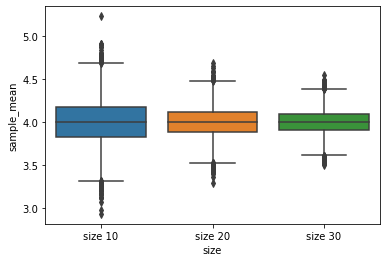

In [15]:
sns.boxplot(data=sample_result, x='size', y='sample_mean')

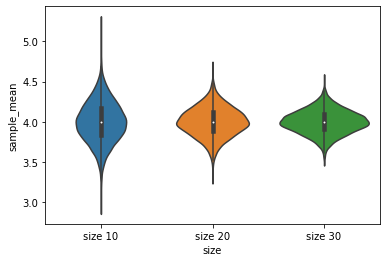

In [16]:
sns.violinplot(data=sample_result, x='size', y='sample_mean')

In [20]:
# 표준오차
se = 0.8/np.sqrt(10)
se

0.25298221281347033

In [18]:
se = 0.8/np.sqrt(20)
se

0.17888543819998318

In [19]:
se = 0.8/np.sqrt(30)
se

0.1460593486680443

In [21]:
stats.norm.pdf(loc=4, scale=0.8, x=3)

0.2283113567362774

In [22]:
x_plot=np.arange(start=1, stop=7.1, step=0.1)
x_plot

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

In [24]:
for i in x_plot:
    print(stats.norm.pdf(loc=4, scale=0.8, x=i))
    

0.0004407446029593068
0.0006988269027902072
0.001090853368807202
0.001676398591862975
0.0025363100716247144
0.0037778225439984553
0.005539810514922523
0.007997650388404467
0.011366953126988842
0.015905226996039346
0.02191037561696074
0.029714876037392347
0.0396745647945844
0.052151231570423444
0.06748870814148528
0.08598284478336515
0.10784664853313974
0.13317283516323178
0.16189699458236514
0.1937653318228671
0.22831135673627803
0.2648458072196251
0.30246340564892993
0.34006874797318015
0.3764217901935063
0.4102012106879695
0.440081658455375
0.46481886733721167
0.48333514600356187
0.49479710868093707
0.49867785050179086
0.4947971086809367
0.4833351460035611
0.4648188673372106
0.44008165845537356
0.41020121068796767
0.3764217901935044
0.3400687479731783
0.30246340564892793
0.26484580721962286
0.22831135673627614
0.19376533182286543
0.16189699458236353
0.13317283516323017
0.10784664853313847
0.08598284478336414
0.0674887081414844
0.05215123157042261
0.03967456479458379
0.029714876037391

In [25]:
y_plot=[]
for i in x_plot:
    y_plot.append(stats.norm.pdf(loc=4, scale=0.8, x=i))

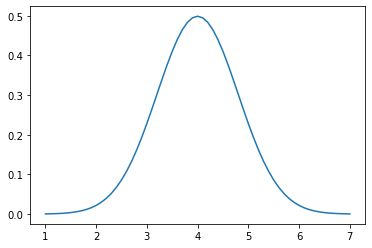

In [26]:
plt.plot(x_plot, y_plot)

In [27]:
# 위의 정규 분포에서 3보다 작을 확률

In [31]:
simulated_sample = stats.norm.rvs(loc=4, scale=0.8, size=1000000)
simulated_sample

array([3.40882692, 4.08958569, 4.90985109, ..., 2.66122883, 3.96735035,
       4.46070712])

In [32]:
sum(simulated_sample <= 3) / len(simulated_sample)

0.105812

In [37]:
stats.norm.cdf(loc=4, scale=0.8, x=3) # x축의 값이 3일 때 확률 뽑기

0.10564977366685535

In [34]:
# 표준화
(3-4)/0.8

-1.25

In [40]:
# z(1.25)
0.5-0.3944 # cdf한 값이랑 비슷

0.10560000000000003

In [41]:
stats.norm.ppf(loc=4, scale=0.8, q=0.1056) # x축의 값 뽑기

2.9997819550131375

In [42]:
stats.norm.ppf(loc=0, scale=1, q=0.95)

1.6448536269514722

In [43]:
# t분포 => 모분산 대신 표본의 분산을 사용

In [44]:
t_value_array = np.zeros(10000)

norm_dist = stats.norm(loc=4, scale=0.8)

for i in range(0, 10000):
    sample = norm_dist.rvs(size=10) #10개짜리 표본 추출
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    sample_se = sample_std/np.sqrt(len(sample))
    t_value_array[i] = (sample_mean-4)/sample_se

In [45]:
t_value_array

array([-0.24033287,  0.46123212,  1.16365335, ...,  1.04219302,
       -2.00080726, -0.9767125 ])

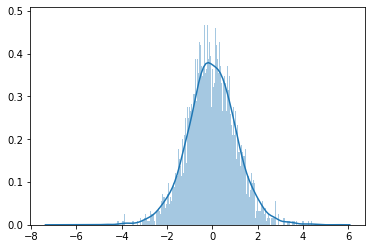

In [47]:
sns.distplot(t_value_array, bins=1000)

In [48]:
# 추정 - 모평균 구간추정

In [49]:
fish = pd.read_csv('./3-7-1-fish_length.csv')
fish.head()

,length
0,4.352982
1,3.735304
2,5.944617
3,3.798326
4,4.087688


In [50]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   length  10 non-null     float64
dtypes: float64(1)
memory usage: 208.0 bytes


In [52]:
np.mean(fish)

length    4.187039
dtype: float64

In [53]:
np.var(fish)

length    0.612272
dtype: float64

In [54]:
np.var(fish, ddof=1)

length    0.680302
dtype: float64

In [55]:
# 표준 오차 

In [61]:
se = np.std(fish['length'], ddof=1)/np.sqrt(len(fish))
se

0.2608259396768776

In [57]:
#모평균 95% 신뢰구간을 추정하시오

In [59]:
# x_mean - t(9, 0.25)*se < 모평균 < x_mean + t(9, 0.25)*se

In [63]:
print(4.18-(2.262*se), '~', 4.18+(2.262*se))

3.5900117244509024 ~ 4.769988275549097


In [64]:
# t분포 신뢰구간

In [65]:
stats.t.interval(alpha=0.95, df=9, loc=4.18, scale=se)

(3.5899707323313015, 4.770029267668698)

In [66]:
# 확률을 통해 t값을 추출

In [67]:
stats.t.ppf(q=0.975, df=9) # 자유도가 9이고 확률이 0.975일때의 t값

2.2621571627409915

In [68]:
stats.t.interval(alpha=0.95, df=9, loc=4.18, scale=0.8)

(2.370274269807206, 5.989725730192793)

In [69]:
# 시뮬레이션을 통한 신뢰구간

In [70]:
be_included_array = np.zeros(20000, dtype='bool')

norm_dist = stats.norm(loc=4, scale=0.8)

for i in range(0, 20000):
    sample = norm_dist.rvs(size=10)
    df = len(sample)-1
    mu = np.mean(sample)
    std = np.std(sample, ddof=1)
    se = std/np.sqrt(len(sample))
    interval = stats.t.interval(0.95, df, mu, se)
    if(interval[0] <= 4 and interval[1] >=4):
        be_included_array[i] = True

In [71]:
sum(be_included_array)/len(be_included_array)

0.95025

In [72]:
# 검정
# 1. 귀무가설 : 과자의 무게가 50이다.
# 2. 대립가설 : 과자의 무게가 50이 아니다

In [77]:
junk_food = pd.read_csv('./3-8-1-junk-food-weight.csv')['weight']
junk_food

0     58.529820
1     52.353039
2     74.446169
3     52.983263
4     55.876879
5     67.659849
6     47.726141
7     50.266907
8     56.500826
9     52.361040
10    45.457883
11    53.360988
12    52.129368
13    59.827773
14    41.681692
15    49.398568
16    64.211128
17    69.858648
18    42.910564
19    60.158780
Name: weight, dtype: float64

In [83]:
x_mean = np.mean(junk_food)
x_mean

55.38496619666667

In [84]:
# 자유도
df = len(junk_food)-1
df

19

In [91]:
# 표준오차
sigma = np.std(junk_food, ddof=1)
se = np.std(junk_food, ddof=1)/np.sqrt(len(junk_food))
se

1.957927680575589

In [85]:
# t_value 모평균을 50이라고 가정
mu = np.mean(junk_food)
t_value = (x_mean-50)/se
t_value

2.750339683171343

In [86]:
# p_value
alpha = stats.t.cdf(t_value, df=df)
alpha

0.993637204993738

In [87]:
(1-alpha)*2

0.012725590012524046

In [88]:
# 대립가설 채택

In [89]:
# 가설검정
stats.ttest_1samp(junk_food, 50) 

Ttest_1sampResult(statistic=2.750339683171343, pvalue=0.012725590012524182)

In [90]:
# 가설검정 시뮬레이션

In [92]:
size = len(junk_food)
sigma = np.std(junk_food, ddof=1)

t_value_array = np.zeros(50000)
norm_dist = stats.norm(loc=50, scale=sigma)

for i in range(0, 50000):
    sample = norm_dist.rvs(size=size)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    sample_se = sample_std/np.sqrt(size)
    t_value_array[i] = (sample_mean-50)/sample_se

In [93]:
t_value_array

array([ 1.71730476, -1.30502728,  1.63875885, ..., -0.27293799,
       -0.07799309, -1.4732851 ])

In [98]:
(sum((t_value_array > t_value)/50000))*2

0.01304000000000003

In [162]:
# 가설검정 : 두 집단간 평균의 차이에 대한 가설검정

In [163]:
# 1. 동일 집단의 비교 : 쌍체검정

In [165]:
paired_test_data = pd.read_csv('./3-9-1-paired-t-test.csv')
paired_test_data

,person,medicine,body_temperature
0,A,before,36.2
1,B,before,36.2
2,C,before,35.3
3,D,before,36.1
4,E,before,36.1
5,A,after,36.8
6,B,after,36.1
7,C,after,36.8
8,D,after,37.1
9,E,after,36.9


In [171]:
before = paired_test_data.query('medicine == "before"')['body_temperature']
after = paired_test_data.query('medicine == "after"')['body_temperature']

In [172]:
before = np.array(before)
after = np.array(after)

In [173]:
diff = after - before
diff

array([ 0.6, -0.1,  1.5,  1. ,  0.8])

In [174]:
# 귀무가설 : 약을 복용 전후에 체온의 차이가 없다. => diff의 평균은 '0'
# 대립가설 : 약을 복용 전후에 체온의 차이가 있다. => diff의 평균은 '0'이 아니다

In [175]:
stats.ttest_1samp(diff, 0)

Ttest_1sampResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

In [176]:
# 쌍체검정 : 동일집단이나 연관된 집단 사이의 평균에 대한 검정
stats.ttest_rel(after, before)

Ttest_relResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

In [177]:
# 유의수준 0.05에서 대립가설을 채택

In [99]:
# after와 before 값이 서로 다른 독립된 집단의 데이터
# 쌍체검사 X, 이집단 t검정 O(모분산을 모를 때)
# 이집단 등분산 t검정(모분산이 동일할 때)
# 이집단 이분산 t검정(모분산을 알 수 없다)

In [ ]:
stats.ttest_ind(after, before, equal_var=False)

In [ ]:
# 대립가설을 채택

In [178]:
# 회귀분석

In [100]:
beer = pd.read_csv('./5-1-1-beer.csv')
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


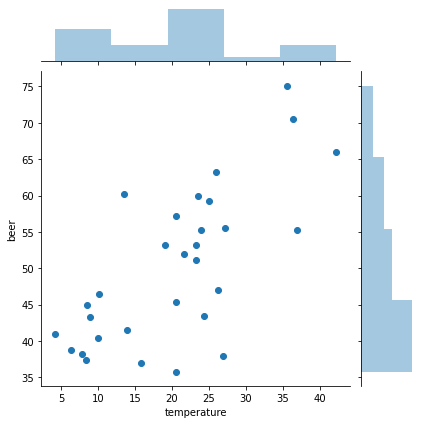

In [102]:
sns.jointplot(data=beer, x='temperature', y='beer')

In [103]:
beer['temperature'].corr(beer['beer'])

0.70990092482063

In [105]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [107]:
# beer : 종속변수
# temperature : 독립변수

lm_model = smf.ols(formula = 'beer ~ temperature', data=beer).fit()

In [108]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           1.11e-05
Time:                        15:30:46   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

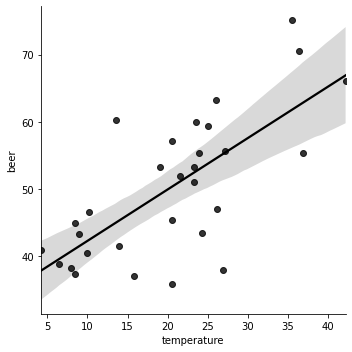

In [111]:
sns.lmplot(x='temperature', y='beer', data=beer, 
           scatter_kws={'color':'black'},
           line_kws = {'color':'black'}
          )

In [113]:
pd.DataFrame({'temperature':[0]})

,temperature
0,0


In [114]:
lm_model.predict(pd.DataFrame({'temperature':[0]}))

0    34.610215
dtype: float64

In [179]:
lm_model.predict(pd.DataFrame({'temperature':[20]}))

0    49.918767
dtype: float64

In [116]:
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [115]:
lm_model.predict()

array([50.3014808 , 53.74590495, 42.26449113, 55.20021737, 46.70397114,
       37.82501112, 44.94348769, 54.51133254, 52.44467805, 41.11634975,
       54.66441806, 49.22988218, 53.21010564, 52.44467805, 41.03980699,
       52.59776357, 45.24965873, 61.78289462, 55.42984564, 50.3014808 ,
       42.41757665, 50.3014808 , 51.14345115, 40.6570932 , 66.91125946,
       52.9039346 , 62.85449324, 41.42252079, 62.47177945, 39.50895182])

In [117]:
b0 = lm_model.params[0]
b1 = lm_model.params[1]

In [118]:
y=b0 +b1*beer.temperature

In [119]:
y

0     50.301481
1     53.745905
2     42.264491
3     55.200217
4     46.703971
5     37.825011
6     44.943488
7     54.511333
8     52.444678
9     41.116350
10    54.664418
11    49.229882
12    53.210106
13    52.444678
14    41.039807
15    52.597764
16    45.249659
17    61.782895
18    55.429846
19    50.301481
20    42.417577
21    50.301481
22    51.143451
23    40.657093
24    66.911259
25    52.903935
26    62.854493
27    41.422521
28    62.471779
29    39.508952
Name: temperature, dtype: float64

In [120]:
# 잔차
lm_model.predict() - beer['beer'] # 모델 예측값, 실제값의 차이

0      5.001481
1     -5.554095
2      1.864491
3     17.200217
4      9.703971
5     -3.074989
6    -15.256512
7     -8.788667
8      1.344678
9     -3.783650
10     7.664418
11    -3.970118
12     9.710106
13    -0.755322
14     3.639807
15    -7.302236
16     3.749659
17   -13.317105
18    -0.170154
19    -6.898519
20    -4.082423
21    14.501481
22    -0.756549
23     2.457093
24     0.911259
25    -2.396065
26     7.554493
27    -1.877479
28    -8.028221
29     0.708952
Name: beer, dtype: float64

In [121]:
lm_model.resid.head()

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

In [122]:
# 결정계수
# (y_hat - y_mean)/(y-y_mean)

In [123]:
lm_model.rsquared_adj

0.4862435845990851

In [124]:
lm_model.rsquared

0.5039593230611856

In [125]:
y_hat = lm_model.predict()
y = beer['beer']
y_mean = np.mean(beer['beer'])

In [128]:
sum((y_hat - y_mean)**2)/sum((y-y_mean)**2)

0.5039593230611877

In [129]:
# 잔차

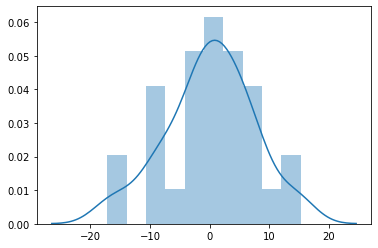

In [132]:
sns.distplot(lm_model.resid, bins=10)

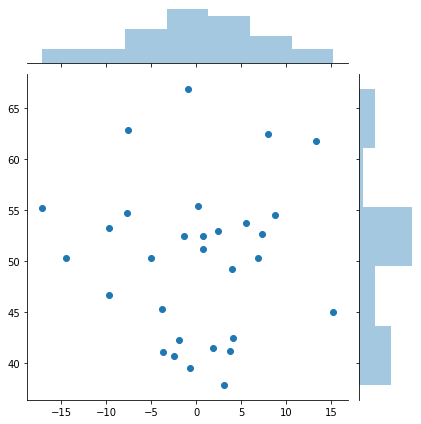

In [133]:
sns.jointplot(lm_model.resid, lm_model.predict())

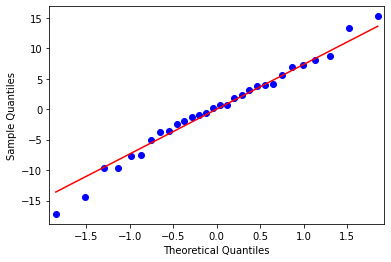

In [134]:
fig = sm.qqplot(lm_model.resid, line='s')

In [135]:
# 분산분석
# - 세 집단 이상의 평균의 차이를 검정

In [136]:
weather = ['cloud', 'cloud', 'rainy','rainy', 'sunny','sunny']
beer = [6,8,2,4,10,12]
weather_beer = pd.DataFrame({
    'beer': beer,
    'weather': weather
})
weather_beer

,beer,weather
0,6,cloud
1,8,cloud
2,2,rainy
3,4,rainy
4,10,sunny
5,12,sunny


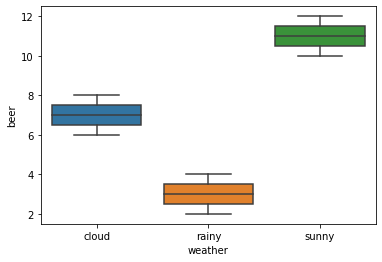

In [137]:
sns.boxplot(x = 'weather', y='beer', data=weather_beer)

In [138]:
weather_beer.groupby('weather').mean()

,beer
weather,
cloud,7
rainy,3
sunny,11


In [139]:
effect = [7,7,3,3,11,11]

In [142]:
# 그룹내에서 편차 합
resid = weather_beer['beer'] - effect

In [143]:
squares_resid = sum(resid**2)
squares_resid

6

In [144]:
# 그룹간 편차 합

In [149]:
mu_effect = np.mean(effect)
squares_model = np.sum((effect - mu_effect)**2)
squares_model

64.0

In [150]:
# 분산분석 : F비 = (그룹간 평균편차 / 그룹내 평균편차)

In [151]:
# 그룹간 평균편차
# 그룹간 자유도 : 그룹수(3) - 1

msw = squares_model/2

In [152]:
# 그룹내 평균편차
# 그룹내 자유도 : 전체데이터수(6) - 그룹수(3)

mse = squares_resid/3

In [153]:
# F비
msw/mse

16.0

In [154]:
sp.stats.f.cdf(x=16, dfn=2, dfd=3)

0.9749054266956091

In [155]:
p_value = 1-sp.stats.f.cdf(x=16, dfn=2, dfd=3)
p_value

0.02509457330439091

In [156]:
# p_value가 유의수준 0.05보다 작으므로 대립가설 채택

In [161]:
# statsmodel을 활용한 분산분석

In [159]:
anova_model = smf.ols('beer ~ weather', data=weather_beer).fit()

In [160]:
sm.stats.anova_lm(anova_model, typ=2)

,sum_sq,df,F,PR(>F)
weather,64.0,2.0,16.0,0.025095
Residual,6.0,3.0,NaN,NaN
